In [24]:
import os
import numpy as np
import tensorflow as tf
import cv2
import imghdr
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [3]:
data_path = "data"
ext = ["jpg", "jpeg", "png"]
sub_folders = ["happy", "sad"]

In [4]:
for folder in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, folder)):
        img_path = os.path.join(data_path, folder, image)
        try:
            img = cv2.imread(img_path)
            img_ext = imghdr.what(img_path)
            if if_ext not in ext:
                os.remove(img_path)
        except Exception:
            print("Something went wrong with {}".format(img_path))
            

Something went wrong with data/happy/image26.jpeg
Something went wrong with data/happy/group-of-happy-people-2.jpg
Something went wrong with data/happy/images26.jpg
Something went wrong with data/happy/happy-people.jpg
Something went wrong with data/happy/HappyPeopleBanner.png
Something went wrong with data/happy/Screen-Shot-2012-10-23-at-12.57.22-PM.png
Something went wrong with data/happy/7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
Something went wrong with data/happy/Top-Secrets-of-How-to-be-Happy.jpg
Something went wrong with data/happy/tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg
Something went wrong with data/happy/fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
Something went wrong with data/happy/_happy_jumping_on_beach-40815.jpg
Something went wrong with data/happy/image27.jpeg
Something went wrong with data/happy/hdptcar-fi-2.jpg
Something went wrong with data/happy/images6.jpg
Something went wrong with data/happy/A_Sep20_14_11891

In [35]:
# Creates a tf dataset from directory, returns batches(batch=32) of images from directory given together with labesl
data = tf.keras.utils.image_dataset_from_directory(data_path)

Found 1 files belonging to 1 classes.


In [36]:
# Make it a iterable
data_iter = data.as_numpy_iterator()

# Grab a batch, since its not an iterable, we can get the next batch by typing .next
#batch = data_iter.next()

In [37]:
# Display images so that we know what happy resp sad pictures are labeled as.
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

StopIteration: 

We can see that Happy is labeled with 0 and sad with 1

In [38]:
# Lets do some image preprocessing, lets normalize the data between 0 and 1.
scaled_data = data.map(lambda x, y: (x/255, y))
scaled_data_iter = scaled_data.as_numpy_iterator()
batch = scaled_data_iter.next()

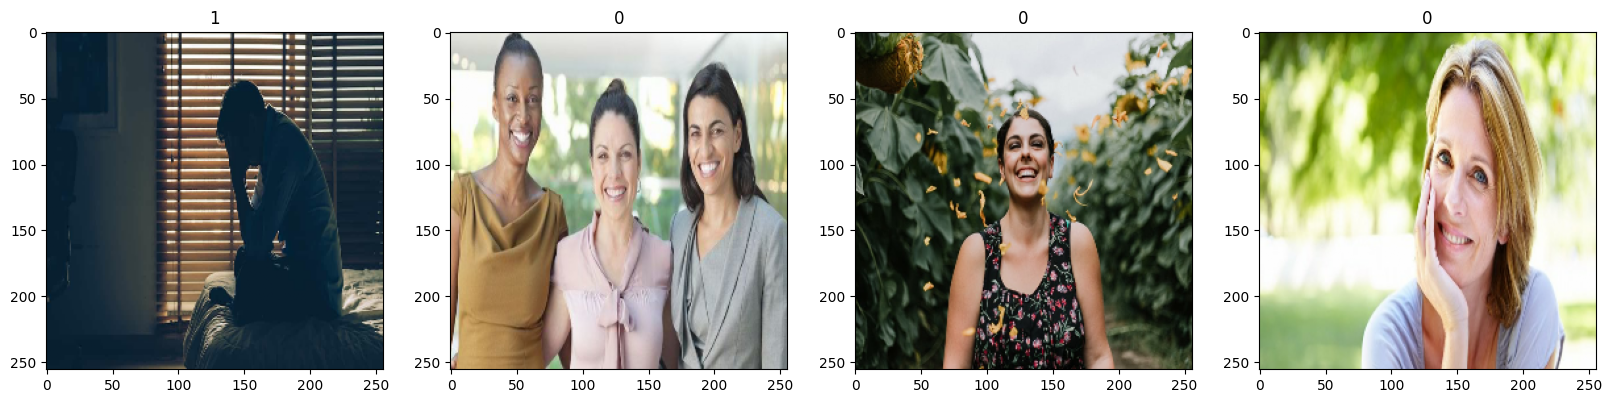

In [21]:
# Display images so that we know what happy resp sad pictures are labeled as. Now with the normalized data
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(batch[1][i])

Lets divide the data into training, test and validation samples

In [39]:
training_data_size = int(len(scaled_data) * .65)
test_data_size = int(len(scaled_data) * .20)+1
val_data_size = int(len(scaled_data) * .15)+1

In [23]:
training_data = scaled_data.take(training_data_size)
test_data = scaled_data.skip(training_data_size).take(test_data_size)
val_data = scaled_data.skip(training_data_size + test_data_size).take(val_data_size)

In [25]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(256, 256, 3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation="relu"))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation="relu"))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(1, activation="sigmoid"))


In [26]:
network.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
history = network.fit(training_data, epochs=10, validation_data=val_data, verbose = 1, batch_size=32)

Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 5.7252 - accuracy: 0.4688 - val_loss: 0.6383 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 0.6599 - accuracy: 0.6250 - val_loss: 0.5275 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 0.5784 - accuracy: 0.7292 - val_loss: 0.7688 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 0.6027 - accuracy: 0.6562 - val_loss: 0.5453 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.4717 - accuracy: 0.7708 - val_loss: 0.3724 - val_accuracy: 0.8000
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.4216 - accuracy: 0.8229 - val_loss: 0.4607 - val_accuracy: 0.8000
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.2532 - accuracy: 0.9688 - val_loss: 0.2261 - val_accuracy: 0.9000
Epoch 8/10
3/3 [=========================

In [43]:
batch = scaled_data_iter.next()
batch
#predict_target = network.predict(test_data)
#predict_target = np.round(predict_target)
#predict_target

StopIteration: 